# 贡献度模型

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 从Excel文件读取数据
data = pd.read_excel('D:\新建文件夹 (2)\柯内特数据分析比赛\DongGuang_END.xlsx')

# 只保留需要考虑的因子列
factors = ['高锰酸钾', '氨氮', '总磷', '总氮']
data = data[['河流'] + factors]

# 根据"河流"分组计算因子贡献度
grouped_data = data.groupby('河流')

# 定义因子的标准限制
factor_limits = {
    '高锰酸钾': [2, 4, 6, 10, 15],
    '氨氮': [0.15, 0.5, 1.0, 1.5, 2.0],
    '总磷': [0.02, 0.1, 0.2, 0.3, 0.4],
    '总氮': [0.2, 0.5, 1.0, 1.5, 2.0]
}

In [39]:
# 单因子污染指数评价法
def calculate_single_factor_pollution_index(group):
    pollution_index = {}
    for factor in factors:
        factor_data = group[factor]
        max_value = factor_limits[factor][-1]
        min_value = factor_limits[factor][0]
        avg_value = factor_data.mean()
        index = avg_value / max_value  # 公式为 Ci / Si
        pollution_index[factor] = index
    return pd.Series(pollution_index)
single_factor_pollution_index = grouped_data.apply(calculate_single_factor_pollution_index)

In [40]:
print("单因子污染指数评价法：")
print(single_factor_pollution_index)

单因子污染指数评价法：
           高锰酸钾        氨氮        总磷        总氮
河流                                           
东江     0.214326  0.079199  0.173658  1.291736
东江南支流  0.112085  0.034106  0.149401  1.116683
东莞运河   0.240139  0.387537  0.311143  3.688529
石马河    0.274974  0.503481  0.632601  4.532435


In [43]:
normalized_index

河流,东江,东江南支流,东莞运河,石马河
高锰酸钾,0.121851,0.079365,0.051896,0.046265
氨氮,0.045027,0.024150,0.083749,0.084711
总磷,0.098730,0.105787,0.067240,0.106436
总氮,0.734392,0.790698,0.797115,0.762588


In [42]:
import pandas as pd

# 归一化单因子污染指数
normalized_index = single_factor_pollution_index.T / single_factor_pollution_index.sum(axis=1)

# 计算污染贡献度
pollution_contribution = normalized_index.T

print("污染贡献度：")
print(pollution_contribution)

污染贡献度：
           高锰酸钾        氨氮        总磷        总氮
河流                                           
东江     0.121851  0.045027  0.098730  0.734392
东江南支流  0.079365  0.024150  0.105787  0.790698
东莞运河   0.051896  0.083749  0.067240  0.797115
石马河    0.046265  0.084711  0.106436  0.762588


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
# 显示中文标签,处理中文乱码问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 坐标轴负号的处理
plt.rcParams['axes.unicode_minus'] = False
# 将横、纵坐标轴标准化处理，确保饼图是一个正圆，否则为椭圆

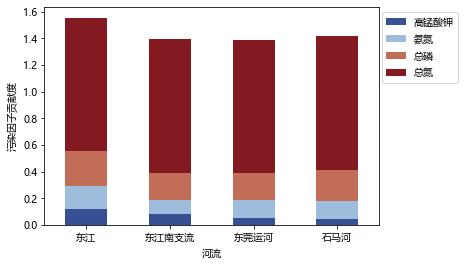

In [51]:
# 计算堆积百分比
stacked_data = pollution_contribution.cumsum(axis=1)

# 自定义颜色列表
colors = ['#375093', '#9EBCDB', '#C16D58', '#831A21']

# 绘制堆积柱状图
ax = stacked_data.plot(kind='bar', stacked=True, color=colors)
# 设置图形属性
plt.xlabel('河流')
plt.ylabel('污染因子贡献度')
# plt.title('每条河流各指标的污染因子贡献度')

# 设置 x 轴刻度和标签
plt.xticks(range(len(pollution_contribution)), pollution_contribution.index, rotation=0)

# 设置图例在右上角
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# 显示图形
plt.show()


In [46]:
pollution_contribution

,高锰酸钾,氨氮,总磷,总氮
河流,,,,
东江,0.121851,0.045027,0.098730,0.734392
东江南支流,0.079365,0.024150,0.105787,0.790698
东莞运河,0.051896,0.083749,0.067240,0.797115
石马河,0.046265,0.084711,0.106436,0.762588


In [23]:
# 内梅罗污染指数评价法
import math
import numpy as np

def calculate_nemerow_comprehensive_pollution_index(group):
    pollution_index = {}
    for factor in factors:
        factor_data = group[factor]
        max_value = factor_limits[factor][-1]
        min_value = factor_limits[factor][0]
        avg_value = factor_data.mean()
        index = avg_value / max_value
        pollution_index[factor] = index
    n_avg = np.mean(list(pollution_index.values()))
    n_max = max(pollution_index.values())
    comprehensive_pollution_index = math.sqrt((n_avg**2 + n_max**2) / 2) 
    return comprehensive_pollution_index
nemerow_comprehensive_pollution_index = grouped_data.apply(calculate_nemerow_comprehensive_pollution_index)


In [24]:
print("内梅罗综合污染指数评价法：")
print(nemerow_comprehensive_pollution_index)

内梅罗综合污染指数评价法：
河流
东江       0.964869
东江南支流    0.828142
东莞运河     2.733452
石马河      3.372742
dtype: float64


In [5]:
data

,河流,高锰酸钾,氨氮,总磷,总氮
0,石马河,4.951111,0.969489,0.304244,10.074111
1,东莞运河,3.704889,0.852889,0.136256,7.943444
2,东江,3.843444,0.173511,0.082589,3.780556
3,东江南支流,2.071889,0.084233,0.067989,2.402444
4,石马河,5.266300,1.214510,0.344120,10.387200
...,...,...,...,...,...
9499,东江南支流,2.164182,0.043764,0.063900,2.335273
9500,石马河,4.712000,0.439020,0.186770,8.810500
9501,东莞运河,4.361200,0.815080,0.113310,5.445700
9502,东江,4.277600,0.045610,0.063820,2.794000


In [1]:
# 内梅罗污染指数评价法
def calculate_nemerow_comprehensive_pollution_index(group):
    pollution_index = {}
    for factor in factors:
        factor_data = group[factor]
        max_value = factor_limits[factor][-1]
        min_value = factor_limits[factor][0]
        avg_value = factor_data.mean()
        index = avg_value / max_value
        pollution_index[factor] = index
    comprehensive_pollution_index = sum(pollution_index.values()) / len(pollution_index)
    return comprehensive_pollution_index

nemerow_comprehensive_pollution_index = grouped_data.apply(calculate_nemerow_comprehensive_pollution_index)

NameError: name 'grouped_data' is not defined

In [20]:
print("内梅罗综合污染指数评价法：")
print(nemerow_comprehensive_pollution_index)

内梅罗综合污染指数评价法：
河流
东江       0.439730
东江南支流    0.353069
东莞运河     1.156837
石马河      1.485873
dtype: float64


In [39]:
import pandas as pd
import numpy as np
import math

# 从Excel文件读取数据
data = pd.read_excel('D:\新建文件夹 (2)\柯内特数据分析比赛\DongGuang_END.xlsx')

# 只保留需要考虑的因子列
factors = ['高锰酸钾', '氨氮', '总磷', '总氮']
data = data[['河流', '监测时间'] + factors]

# 根据日期提取月份
data['月份'] = pd.to_datetime(data['监测时间']).dt.month

# 根据"河流"和"月份"分组计算因子贡献度
grouped_data = data.groupby(['河流', '月份'])

# 定义因子的标准限制
factor_limits = {
    '高锰酸钾': [2, 4, 6, 10, 15],
    '氨氮': [0.15, 0.5, 1.0, 1.5, 2.0],
    '总磷': [0.02, 0.1, 0.2, 0.3, 0.4],
    '总氮': [0.2, 0.5, 1.0, 1.5, 2.0]
}

def calculate_nemerow_comprehensive_pollution_index(group):
    pollution_index = {}
    for factor in factors:
        factor_data = group[factor]
        max_value = factor_limits[factor][-1]
        min_value = factor_limits[factor][0]
        avg_value = factor_data.mean()
        index = avg_value / max_value
        pollution_index[factor] = index
    n_avg = np.mean(list(pollution_index.values()))
    n_max = max(pollution_index.values())
    comprehensive_pollution_index = math.sqrt((n_avg**2 + n_max**2) / 2) 
    return comprehensive_pollution_index

nemerow_comprehensive_pollution_index = grouped_data.apply(calculate_nemerow_comprehensive_pollution_index).unstack()
print("内梅罗污染指数评价法：")
nemerow_comprehensive_pollution_index


内梅罗污染指数评价法：


月份,1,2,3,4,5,6,7,8,9,10,11,12
河流,,,,,,,,,,,,
东江,0.976289,0.917597,1.043838,1.123512,1.119949,0.712584,0.706797,0.921392,0.987616,0.912150,1.034348,0.964598
东江南支流,0.728925,0.631102,0.721958,0.948561,0.988281,1.098459,0.735323,0.807536,0.817232,0.744997,0.810462,0.737883
东莞运河,3.067827,3.225685,3.212327,2.918691,2.384549,1.994459,2.152245,2.043956,2.605410,3.312400,2.987371,3.289290
石马河,3.125987,4.047278,3.827644,3.573713,3.185490,2.655556,2.874018,2.672904,3.297512,3.666355,3.638147,4.158454


In [37]:
from matplotlib import pyplot as plt
# 显示中文标签,处理中文乱码问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 坐标轴负号的处理
plt.rcParams['axes.unicode_minus'] = False
# 将横、纵坐标轴标准化处理，确保饼图是一个正圆，否则为椭圆

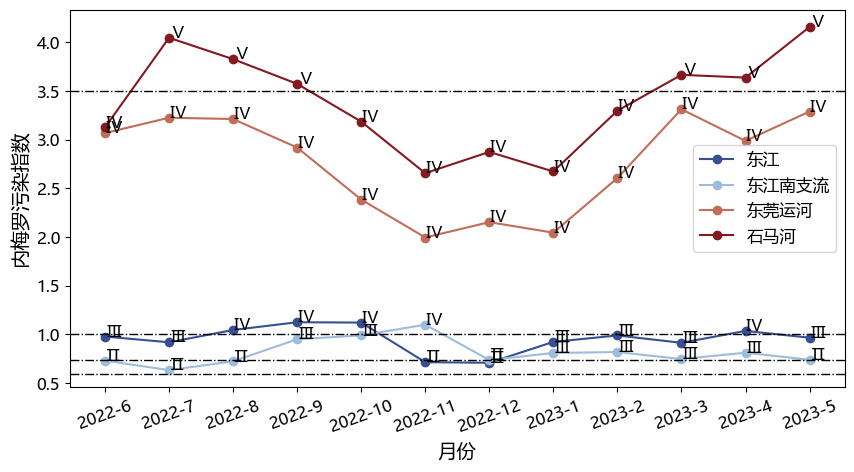

In [114]:
# 绘制每个月的污染指数折线图
# 生成日期范围
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-01')
months1 = [ '2022-6', '2022-7', '2022-8', '2022-9', '2022-10', '2022-11', '2022-12', '2023-1', '2023-2', '2023-3', '2023-4', '2023-5']
rivers = ['东江', '东江南支流', '东莞运河', '石马河']
plt.figure(figsize=(10, 5), dpi=100)
months = nemerow_comprehensive_pollution_index.columns.to_numpy()
colors = ['#375093', '#9EBCDB', '#C16D58', '#831A21'] 
for i, river in enumerate(rivers):
    values = nemerow_comprehensive_pollution_index.loc[river].to_numpy()
    plt.plot(months, values, marker='o', label=river, color=colors[i % len(colors)])
    for j, value in enumerate(values):
        level = ''
        if value < 0.59:
            level = 'Ⅰ'
        elif 0.59 <= value < 0.74:
            level = 'Ⅱ'
        elif 0.74 <= value < 1.00:
            level = 'Ⅲ'
        elif 1.00 <= value < 3.50:
            level = 'Ⅳ'
        else:
            level = 'Ⅴ'
        plt.text(j + 1, value, level)

# 绘制四条分界线
plt.axhline(y=0.59, color='black', linestyle='-.', linewidth=1)
plt.axhline(y=0.74, color='black', linestyle='-.', linewidth=1)
plt.axhline(y=1.0, color='black', linestyle='-.', linewidth=1)
plt.axhline(y=3.5, color='black', linestyle='-.', linewidth=1)
plt.xticks(range(1, 13), months1, rotation=20)
plt.xlabel('月份', fontsize=14)
plt.ylabel('内梅罗污染指数', fontsize=14)
p#lt.title('内梅罗污染指数随月份的变化', fontsize=16)
plt.legend()
plt.show()

In [100]:
single_factor_pollution_index

,高锰酸钾,氨氮,总磷,总氮
0,0.214326,0.079199,0.173658,1.291736
1,0.112085,0.034106,0.149401,1.116683
2,0.240139,0.387537,0.311143,3.688529
3,0.274974,0.503481,0.632601,4.532435


In [10]:
# 主成分分析法
from sklearn.decomposition import PCA
from factor_analyzer import calculate_kmo

def calculate_factor_contribution_pca(group):
    factor_data = group[factors]
    
    # 进行KMO检验
    kmo_all, kmo_model = calculate_kmo(factor_data)
    if kmo_model < 0.5:
        print("数据不适合进行主成分分析", kmo_all, kmo_model)
        return None
    
    pca = PCA(n_components=len(factors))
    pca.fit(factor_data)
    component_variances = pca.explained_variance_ratio_
    factor_contribution = {factor: variance for factor, variance in zip(factors, component_variances)}
    principal_components = pd.DataFrame(pca.components_, columns=factors)
    principal_components = principal_components.rename(index={i: f'主成分{i+1}' for i in range(len(factors))})
    principal_components.loc['贡献度'] = component_variances
    principal_components = principal_components.reindex(['贡献度'] + [f'主成分{i+1}' for i in range(len(factors))])
    return principal_components

factor_contribution_pca = grouped_data.apply(calculate_factor_contribution_pca)

数据不适合进行主成分分析 [0.45621701 0.57154626 0.37853089 0.31768719] 0.4168455009757902


E:\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [22]:
print("主成分分析法：")
print(factor_contribution_pca)

主成分分析法：
                高锰酸钾        氨氮        总磷        总氮
河流                                                
东江    贡献度   0.634636  0.337634  0.027363  0.000367
      主成分1  0.782249  0.110884  0.014241  0.612853
      主成分2  0.620187 -0.058804  0.030059 -0.781669
      主成分3 -0.051485  0.991702  0.028198 -0.114369
      主成分4  0.028357  0.027802 -0.999049 -0.018011
东江南支流 贡献度   0.911695  0.078624  0.009360  0.000321
      主成分1  0.638157  0.047428  0.040402  0.767381
      主成分2 -0.767940 -0.006863 -0.020873  0.640145
      主成分3 -0.036635  0.998526  0.023405 -0.032480
      主成分4 -0.041008 -0.025463  0.998691 -0.016904
东莞运河  贡献度   0.854793  0.110920  0.034204  0.000083
      主成分1  0.149503  0.190296  0.007053 -0.970251
      主成分2  0.852661  0.471006  0.030858  0.223987
      主成分3 -0.500610  0.859396  0.049059  0.091773
      主成分4 -0.002811 -0.058137  0.998294 -0.004578
石马河   贡献度   0.771269  0.187997  0.040185  0.000548
      主成分1  0.092747  0.167203  0.008463 -0.981514
      主成分2  0.733771  0

In [5]:
# 标准化处理
data_1 = data.copy()
scaler = StandardScaler()
data_1[factors] = scaler.fit_transform(data_1[factors])
# 根据"河流"分组计算因子贡献度
grouped_data_1 = data_1.groupby('河流')

In [6]:
# 灰色关联分析法02
def calculate_grey_relation(factor_data, reference_sequence):
    # 计算关联度
    rho = 0.5  # 关联度衡量指数，可根据需求进行调整
    grey_relation = (reference_sequence + rho * factor_data) / (factor_data.max() + rho * factor_data).max()
    return grey_relation

def calculate_factor_contribution_grey_relation(group):
    factor_contribution = {}
    reference_sequence = group.iloc[0]  # 选择第一个样本作为参考序列
    for factor in factors:
        factor_data = group[factor]
        grey_relation = calculate_grey_relation(factor_data, reference_sequence)
        factor_contribution[factor] = grey_relation.mean()
    return pd.Series(factor_contribution)

factor_contribution_grey_relation = grouped_data_1.apply(calculate_factor_contribution_grey_relation)

# 打印灰色关联分析法的因子贡献度结果
print("灰色关联分析法：")
print(factor_contribution_grey_relation)


灰色关联分析法：
       高锰酸钾  氨氮  总磷  总氮
河流                     
东江      NaN NaN NaN NaN
东江南支流   NaN NaN NaN NaN
东莞运河    NaN NaN NaN NaN
石马河     NaN NaN NaN NaN


In [8]:
# 灰色关联分析法
def calculate_grey_relation(factor_data, min_value, max_value):
    # 灰色关联度计算
    # 这里使用简单的线性归一化方法
    normalized_data = (factor_data - min_value) / (max_value - min_value)
    reference_sequence = normalized_data.iloc[0]
    grey_relation = 1 / (abs(reference_sequence - normalized_data) + 0.5).max()
    return grey_relation

def calculate_factor_contribution_grey_relation(group):
    factor_contribution = {}
    for factor in factors:
        factor_data = group[factor]
        min_value = factor_limits[factor][0]
        max_value = factor_limits[factor][-1]
        grey_relation = calculate_grey_relation(factor_data, min_value, max_value)
        factor_contribution[factor] = grey_relation
    return pd.Series(factor_contribution)

factor_contribution_grey_relation = grouped_data_1.apply(calculate_factor_contribution_grey_relation)

In [14]:
print("灰色关联分析法：")
factor_contribution_grey_relation

灰色关联分析法：


,高锰酸钾,氨氮,总磷,总氮
河流,,,,
东江,2 1.266667 6 1.265810 10 1.26...,2 1.150000 6 1.134109 10 1.12...,2 1.100000 6 0.950636 10 1.01...,2 1.200000 6 1.193385 10 1.19...
东江南支流,3 1.266667 7 1.266621 11 1.26...,3 1.150000 7 1.148584 11 1.14...,3 1.100000 7 1.091481 11 1.08...,3 1.200000 7 1.199824 11 1.19...
东莞运河,1 1.266667 5 1.266371 9 1.26...,1 1.150000 5 1.116071 9 1.06...,1 1.100000 5 0.751681 9 0.55...,1 1.200000 5 1.180618 9 1.17...
石马河,0 1.266667 4 1.262844 8 1.26...,0 1.150000 4 0.934065 8 0.82...,0 1.100000 4 0.155162 8 0.15...,0 1.200000 4 1.138001 8 1.16...


In [24]:
print("灰色关联分析法：")
print(factor_contribution_grey_relation)

灰色关联分析法：
           高锰酸钾        氨氮        总磷        总氮
河流                                           
东江     1.632198  0.986170  1.355663  0.442823
东江南支流  1.590819  1.471485  1.108734  0.444701
东莞运河   1.478290  0.789101  1.342888  0.318678
石马河    1.369695  0.601090  0.834095  0.298899


单因子污染指数评价法：
           高锰酸钾        氨氮        总磷        总氮
河流                                           
东江     0.003694 -0.300016 -1.660135 -0.427735
东江南支流 -0.092050 -0.378725 -1.941661 -0.482566
东莞运河   0.027867  0.238182 -0.064502  0.322987
石马河    0.060488  0.440559  3.666298  0.587314
内梅罗综合污染指数评价法：
河流
东江      -0.596048
东江南支流   -0.723750
东莞运河     0.131133
石马河      1.188665
dtype: float64
主成分分析法：
                高锰酸钾        氨氮        总磷        总氮
河流                                                
东江    贡献度   0.728486  0.149252  0.094456  0.027806
      主成分1  0.922943  0.175725  0.331937  0.084346
      主成分2 -0.113435  0.882187 -0.249002  0.383245
      主成分3 -0.315457  0.352053  0.789974 -0.390495
      主成分4  0.189195  0.258701 -0.451394 -0.832780
东江南支流 贡献度   0.895227  0.047949  0.038032  0.018791
      主成分1  0.746414  0.104601  0.602828  0.261769
      主成分2 -0.618592  0.432003  0.649202  0.096195
      主成分3  0.200521  0.892930 -0.403072 -0.000343
      主成分4 -0.141425 -0.071467 -0.22949